In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import seed
import random
from itertools import combinations

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.8.0
!pip install keras-tuner

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
ComplaintsData = pd.read_csv('complaints_processed.csv')
ComplaintsData

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
ComplaintsData.columns = ['Record', 'Class', 'Narrative']

In [ ]:
print(ComplaintsData.shape)

(162421, 3)


In [ ]:
print(ComplaintsData['Class'].unique())

['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans'
 'debt_collection']


In [ ]:
ComplaintsData.info() # Check data frame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Record     162421 non-null  int64 
 1   Class      162421 non-null  object
 2   Narrative  162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
# Check number of null values in each column
ComplaintsData.isnull().sum()

Record        0
Class         0
Narrative    10
dtype: int64

In [ ]:
# Display records with null values in column 'Narrative'
null_values_df = ComplaintsData[ComplaintsData['Narrative'].isnull()]
print(null_values_df)

        Record             Class Narrative
1089      1089  credit_reporting       NaN
3954      3954  credit_reporting       NaN
3955      3955  credit_reporting       NaN
29690    29690  credit_reporting       NaN
139436  139436   debt_collection       NaN
151052  151052   debt_collection       NaN
154494  154494  credit_reporting       NaN
156902  156902    retail_banking       NaN
158538  158538  credit_reporting       NaN
159503  159503  credit_reporting       NaN


In [ ]:
ComplaintsData.dropna(inplace=True)
ComplaintsData

,Record,Class,Narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
#check whether there are duplicated values
ComplaintsData.duplicated().sum()

0

In [ ]:
ComplaintsData

,Record,Class,Narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
ComplaintsData.drop(columns=['Record'], inplace=True)

In [ ]:
#check whether there are duplicated values
ComplaintsData.duplicated().sum()

37735

In [ ]:
ComplaintsData.drop_duplicates(inplace=True)
ComplaintsData

,Class,Narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,debt_collection,zuntafi sent notice willing settle defaulted s...
162415,debt_collection,name
162417,credit_card,name


In [ ]:
ComplaintsData.duplicated().sum()

0

In [ ]:
duplicates_df = ComplaintsData[ComplaintsData.duplicated(subset=['Narrative'], keep=False)]
duplicates_df

,Class,Narrative
521,credit_reporting,filed dispute regard incorrect item credit rep...
643,credit_reporting,writing due failed remove information affiliat...
647,debt_collection,intend pursue litigation accordance fcra seek ...
648,mortgages_and_loans,intend pursue litigation accordance fcra seek ...
657,debt_collection,identity compromised somebody know please feel...
...,...,...
158618,credit_card,account holder dob fl regulation z give borrow...
162301,debt_collection,failed verify validate data account every nota...
162415,debt_collection,name
162417,credit_card,name


In [ ]:
ComplaintsData.drop_duplicates(subset=['Narrative'], inplace=True)
ComplaintsData = ComplaintsData.reset_index(drop=True)
ComplaintsData

,Class,Narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
124467,retail_banking,zelle suspended account without cause banking ...
124468,debt_collection,zero contact made debt supposedly resolved fou...
124469,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
124470,debt_collection,zuntafi sent notice willing settle defaulted s...


In [ ]:
# Separate x_train, y_train,x_test and y_test after separating features and labels
ComplaintsData_features = ComplaintsData.drop(['Class'], axis = 1) # Dropping target label from features set
ComplaintsData_labels = ComplaintsData.drop(['Narrative'], axis=1) # Target label
ComplaintsData_features

,Narrative
0,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...
4,payment history missing credit report made mis...
...,...
124467,zelle suspended account without cause banking ...
124468,zero contact made debt supposedly resolved fou...
124469,zillow home loan nmls nmls actual quote provid...
124470,zuntafi sent notice willing settle defaulted s...


In [ ]:
ComplaintsData_labels

,Class
0,credit_card
1,credit_card
2,retail_banking
3,credit_reporting
4,credit_reporting
...,...
124467,retail_banking
124468,debt_collection
124469,mortgages_and_loans
124470,debt_collection


In [ ]:
from sklearn.model_selection import train_test_split

x_train_text,x_test_text,y_train_text,y_test_text = train_test_split(ComplaintsData_features,ComplaintsData_labels, test_size=0.2, stratify = ComplaintsData_labels, random_state = 0)

print("y_train:\n", y_train_text.value_counts())
print("y_test:\n", y_test_text.value_counts())

y_train:
 Class              
credit_reporting       44992
debt_collection        16846
mortgages_and_loans    14978
credit_card            11986
retail_banking         10775
Name: count, dtype: int64
y_test:
 Class              
credit_reporting       11248
debt_collection         4211
mortgages_and_loans     3745
credit_card             2997
retail_banking          2694
Name: count, dtype: int64


In [ ]:
x_train_text

,Narrative
106213,second dispute notice going credit report noti...
112014,usaa bank hurting military family commercial i...
48067,needed get credit report available mortgage ag...
57090,spent two complete day trying reach oklahoma u...
91005,please advised dispute validity alleged debt e...
...,...
51324,purchased property back got year fixed mortgag...
76828,navient practicing fraudulent deceptive practi...
35438,citi bank account package checking saving open...
44438,sent multiple dispute hunter warfield stating ...


In [ ]:
x_test_text

,Narrative
96340,start back written four letter send sprint ver...
118947,continues state credit report account past due...
19028,hello writing reference fraudulent attempt try...
107416,mortgage foreclosed loan loan settled somewher...
47322,made new checking account well fargo supposed ...
...,...
73718,husband trying buy house today agent ran credi...
66412,financed car paid cash rest financed made paym...
16666,following account fraudulents fraudulent credi...
73889,husband received call man stated midland credi...


In [ ]:
y_train_text

,Class
106213,credit_reporting
112014,retail_banking
48067,credit_reporting
57090,credit_card
91005,debt_collection
...,...
51324,mortgages_and_loans
76828,mortgages_and_loans
35438,retail_banking
44438,debt_collection


In [ ]:
y_test_text

,Class
96340,debt_collection
118947,credit_reporting
19028,debt_collection
107416,credit_reporting
47322,retail_banking
...,...
73718,credit_reporting
66412,credit_reporting
16666,credit_reporting
73889,debt_collection




---



In [ ]:
from sklearn.preprocessing import LabelEncoder

column_name = 'Class'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
y_train_text[column_name + '_encoded'] = label_encoder.fit_transform(y_train_text[column_name])
y_test_text[column_name + '_encoded'] = label_encoder.transform(y_test_text[column_name])
y_train_text

,Class,Class_encoded
106213,credit_reporting,1
112014,retail_banking,4
48067,credit_reporting,1
57090,credit_card,0
91005,debt_collection,2
...,...,...
51324,mortgages_and_loans,3
76828,mortgages_and_loans,3
35438,retail_banking,4
44438,debt_collection,2


In [ ]:
y_test_text

,Class,Class_encoded
96340,debt_collection,2
118947,credit_reporting,1
19028,debt_collection,2
107416,credit_reporting,1
47322,retail_banking,4
...,...,...
73718,credit_reporting,1
66412,credit_reporting,1
16666,credit_reporting,1
73889,debt_collection,2


In [ ]:
# Drop the original categorical columns
y_train_text = y_train_text.drop(columns='Class')
y_train_text = pd.DataFrame(y_train_text)

y_test_text = y_test_text.drop(columns='Class')
y_test_text = pd.DataFrame(y_test_text)
y_train_text

,Class_encoded
106213,1
112014,4
48067,1
57090,0
91005,2
...,...
51324,3
76828,3
35438,4
44438,2


In [ ]:
y_test_text

,Class_encoded
96340,2
118947,1
19028,2
107416,1
47322,4
...,...
73718,1
66412,1
16666,1
73889,2


In [ ]:
# Value counts
print(y_train_text.Class_encoded.value_counts())
print(y_test_text.Class_encoded.value_counts())

Class_encoded
1    44992
2    16846
3    14978
0    11986
4    10775
Name: count, dtype: int64
Class_encoded
1    11248
2     4211
3     3745
0     2997
4     2694
Name: count, dtype: int64


##Visualization

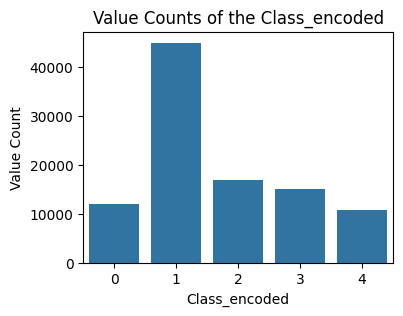

   Class_encoded  Value Count
0              1        44992
1              2        16846
2              3        14978
3              0        11986
4              4        10775


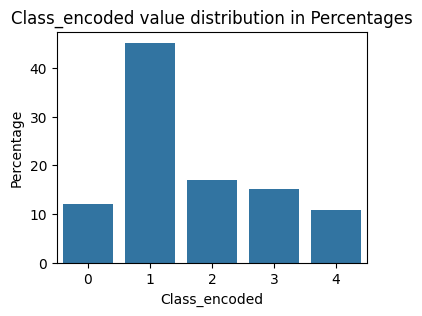

   Class_encoded  counts  Percentage
0              1   44992    45.18312
1              2   16846    16.91756
2              3   14978    15.04163
3              0   11986    12.03692
4              4   10775    10.82077


In [ ]:
# Display value counts for class
feature = "Class_encoded"

# Get value counts for each unique value present in the target label
feature_value_counts = y_train_text[feature].value_counts()

#Convert the series into Dataframe object
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,
                                     'Value Count':feature_value_counts.values})

# Plot the value counts
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Value Count",data=feature_value_counts)
s.set_xticklabels(s.get_xticklabels())
s.set_title("Value Counts of the "+feature)
plt.show()
print(feature_value_counts)

# Get value counts for each unique value present in the target label
feature_percentages = y_train_text[feature].value_counts().reset_index(name ="counts")

# Replace index name with class label
feature_percentages.rename(columns = {'index':feature}, inplace = True)

# Compute the percentage value
feature_percentages["Percentage"] = feature_percentages["counts"].apply(
    lambda x:round(x*100/feature_percentages["counts"].sum(),5))

# Plot the percentage values
plt.figure(figsize = (4,3))
s = sns.barplot(x = feature, y="Percentage",data=feature_percentages)
s.set_title(feature+" value distribution in Percentages")
s.set_xticklabels(s.get_xticklabels())
plt.show()
print(feature_percentages)

##Preprocessing for GloVe Embeddings

In [ ]:
from tkinter.constants import Y
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords and initialize tokenizer
stop_words = set(stopwords.words("english"))
tokenizer = RegexpTokenizer(r'\w+')

# Prepare text data for GloVe embedding
train = []
for par in x_train_text["Narrative"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    train.append(tmp)
# In the code above, the text data is processed within the same loop that constructs the list train. After this data cleaning step, we can proceed to use the list to create word embeddings using the GloVe pre-trained model.

# Make sure that the preprocessing steps are consistent when training when using pre-trained models like GloVe. Consistency ensures that words in our dataset are represented in a similar way to the words in the GloVe vocabulary, enabling meaningful embeddings to be generated.

test = []
for par in x_test_text["Narrative"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    test.append(tmp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##GloVe Embeddings

In [ ]:
import spacy
from spacy.vectors import Vectors

# uploaded the file with 100-dimensional word vectors
uploaded_file_path = 'glove.6B.100d.txt'  # Provide the file path

# Load word vectors into a dictionary using 'latin-1' encoding, skipping invalid lines
word_vectors = {}
with open(uploaded_file_path, 'r', encoding='latin-1') as file:
    for line in file:
        try:
            values = line.strip().split()
            word = values[0]
            vector = [float(val) for val in values[1:]]
            word_vectors[word] = vector
        except (ValueError, IndexError):
            # Skip lines that cannot be converted to floats or don't have enough values
            continue

# Now, word_vectors dictionary contains words as keys and their corresponding 100-dimensional vectors as values

In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings = []
for sentence in train:
    sentence_embeddings = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings:
        average_vector = np.mean(sentence_embeddings, axis=0)
        word_embeddings.append(average_vector)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings.append(np.zeros(100))  # Since 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array = np.array(word_embeddings)
print("Word embeddings shape:", word_embeddings_array.shape)

Word embeddings shape: (99577, 100)


In [ ]:
# Create word embeddings for processed text data using loaded GloVe word vectors
word_embeddings_test = []
for sentence in test:
    sentence_embeddings_test = []
    for word in sentence:
        # Check if the word is in the word_vectors dictionary
        if word in word_vectors:
            # Get the word vector from the loaded GloVe word vectors
            word_vector = word_vectors[word]
            sentence_embeddings_test.append(word_vector)
    # If sentence_embeddings is not empty, calculate the average vector for the sentence
    if sentence_embeddings_test:
        average_vector_test = np.mean(sentence_embeddings_test, axis=0)
        word_embeddings_test.append(average_vector_test)
    else:
        # If the sentence doesn't contain any words from the word_vectors dictionary, consider it as all zeros vector
        word_embeddings_test.append(np.zeros(100))  # Since 100-dimensional word vectors

# Convert word_embeddings to numpy array for further processing
word_embeddings_array_test = np.array(word_embeddings_test)
print("Word embeddings shape:", word_embeddings_array_test.shape)

Word embeddings shape: (24895, 100)


In [ ]:
# Create a new dataframe for word embeddings
train_embeddings_df = pd.DataFrame(word_embeddings_array, columns=[f"embedding_{i}" for i in range(word_embeddings_array.shape[1])])
test_embeddings_df = pd.DataFrame(word_embeddings_array_test, columns=[f"embedding_{i}" for i in range(word_embeddings_array_test.shape[1])])

In [ ]:
train_embeddings_df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,0.024144,-0.118067,0.241512,-0.172893,0.049653,0.022802,-0.213803,0.092111,0.148642,-0.094007,...,-0.116323,-0.050426,-0.056151,-0.249387,0.017637,0.365273,0.173520,-0.208463,0.282457,-0.019855
1,0.046004,0.062340,0.132323,-0.180760,0.034576,0.234538,-0.167772,0.131553,0.144695,0.091790,...,-0.005651,-0.245944,0.098611,-0.279764,-0.240685,0.036565,-0.040903,-0.148720,0.357327,0.014804
2,-0.065015,0.000804,0.292380,-0.212069,-0.089435,-0.031298,-0.194766,0.145052,0.178560,0.004657,...,-0.061402,0.066050,-0.022800,-0.240878,-0.308701,0.093281,0.169183,-0.049013,0.366336,0.107485
3,-0.012227,0.104529,0.346362,-0.172265,-0.087405,0.092806,-0.102289,0.206284,0.138132,-0.058449,...,-0.020399,0.069663,0.040970,-0.125539,-0.433676,-0.014784,0.130194,0.047893,0.320239,-0.015916
4,0.068456,-0.086051,0.196244,0.034527,0.065485,0.018393,-0.159813,0.036747,0.094400,0.178761,...,-0.225043,0.042446,-0.058129,-0.211668,-0.146374,0.168357,-0.045312,-0.176071,0.383075,-0.028725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99572,0.047537,0.052147,0.195883,0.049151,-0.046610,-0.086579,-0.206847,0.095510,0.009749,0.085025,...,-0.210092,-0.068794,-0.050921,-0.176614,-0.300638,0.109839,0.105412,-0.100149,0.389039,-0.012372
99573,0.108495,0.099069,0.144745,0.164777,-0.109461,0.014309,-0.225503,0.292516,-0.004082,0.160398,...,-0.406244,0.004158,-0.073962,-0.295162,-0.162771,-0.061237,0.203264,-0.038928,0.593721,-0.266795
99574,-0.001728,0.065516,0.172532,-0.019015,0.250021,0.095747,-0.145934,0.106034,0.160829,-0.062925,...,-0.016924,0.215423,0.178521,-0.320968,-0.318121,0.051950,0.080271,-0.182952,0.528392,0.204164
99575,0.066083,0.021327,0.218368,-0.069506,-0.143205,0.030474,-0.222845,0.169341,0.058450,0.005895,...,-0.052735,-0.223488,0.047909,-0.169149,-0.307518,0.205115,0.064614,-0.004591,0.371908,-0.139032


In [ ]:
test_embeddings_df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,0.033043,0.218061,0.374653,-0.160811,0.005898,0.119285,-0.129158,0.050395,-0.046193,-0.008581,...,-0.203605,-0.026394,-0.083478,-0.040299,-0.268247,0.077048,-0.008933,-0.072750,0.153513,-0.040915
1,-0.007236,-0.162782,0.301711,-0.172451,0.029025,-0.108677,-0.178273,0.123372,0.085758,0.080339,...,0.002163,-0.001331,-0.125953,-0.182660,-0.223311,0.196413,0.136031,-0.250257,0.478436,-0.070155
2,-0.021611,-0.049646,0.243887,-0.088608,-0.052258,0.017408,-0.222923,0.183548,0.093143,0.029248,...,0.052506,-0.104340,-0.024535,-0.101626,-0.261210,0.234983,0.021812,-0.136907,0.393831,-0.009922
3,0.070515,-0.035680,0.195269,-0.122977,-0.029526,0.078354,-0.170044,0.117986,0.044252,-0.053132,...,-0.190853,-0.044000,0.016698,-0.282699,-0.307491,0.061798,0.136526,0.094101,0.414584,0.007602
4,-0.048861,0.058658,0.334429,-0.167871,0.007624,0.093888,-0.055955,0.334712,-0.060266,-0.115041,...,-0.025200,-0.054812,-0.024267,-0.223397,-0.353705,0.184749,0.051264,-0.044519,0.384224,0.244467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24890,0.124731,0.051143,0.111714,-0.094399,0.048522,0.084210,-0.155007,0.129108,0.068075,-0.062255,...,-0.031054,-0.135462,-0.011239,-0.234790,-0.219957,0.086526,0.000449,-0.091060,0.404001,0.104730
24891,-0.010386,0.039588,0.210529,-0.016596,-0.126978,-0.016016,-0.173279,0.239977,0.100965,0.042598,...,-0.112297,0.000878,-0.038219,-0.271252,-0.310318,0.033220,0.214722,-0.007380,0.416592,-0.102289
24892,0.279806,-0.162049,0.056491,-0.103327,0.071996,0.103501,-0.073350,-0.092067,0.280578,0.095845,...,-0.216225,0.472869,0.170985,-0.618364,0.200779,0.274769,0.319444,-0.115899,0.090538,-0.044704
24893,-0.003561,-0.000255,0.264686,-0.043065,-0.088802,0.197122,-0.166858,0.081556,0.195400,-0.038690,...,-0.061244,-0.052396,0.035762,-0.214118,-0.333479,0.090328,-0.054999,-0.104311,0.265190,-0.008590


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Perform padding on the embeddings for consistency in all records
text_embeddings_padded_train = pad_sequences(train_embeddings_df.to_numpy(), maxlen=100, padding='post', truncating='post', dtype='float32')
text_embeddings_padded_test = pad_sequences(test_embeddings_df.to_numpy(), maxlen=100, padding='post', truncating='post', dtype='float32')

text_embeddings_padded_train = pd.DataFrame(text_embeddings_padded_train)
text_embeddings_padded_test = pd.DataFrame(text_embeddings_padded_test)

In [ ]:
text_embeddings_padded_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.024144,-0.118067,0.241512,-0.172893,0.049653,0.022802,-0.213803,0.092111,0.148642,-0.094007,...,-0.116323,-0.050426,-0.056151,-0.249387,0.017637,0.365273,0.173520,-0.208463,0.282457,-0.019855
1,0.046004,0.062340,0.132323,-0.180760,0.034576,0.234538,-0.167772,0.131553,0.144695,0.091790,...,-0.005651,-0.245944,0.098611,-0.279764,-0.240685,0.036565,-0.040903,-0.148720,0.357327,0.014804
2,-0.065015,0.000804,0.292380,-0.212069,-0.089435,-0.031298,-0.194766,0.145052,0.178560,0.004657,...,-0.061402,0.066050,-0.022800,-0.240878,-0.308701,0.093281,0.169183,-0.049013,0.366336,0.107485
3,-0.012227,0.104529,0.346362,-0.172265,-0.087405,0.092806,-0.102289,0.206284,0.138132,-0.058449,...,-0.020399,0.069663,0.040970,-0.125539,-0.433676,-0.014784,0.130194,0.047893,0.320240,-0.015916
4,0.068456,-0.086051,0.196244,0.034527,0.065485,0.018393,-0.159813,0.036747,0.094400,0.178761,...,-0.225043,0.042446,-0.058129,-0.211668,-0.146374,0.168357,-0.045312,-0.176071,0.383075,-0.028725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99572,0.047537,0.052147,0.195883,0.049151,-0.046610,-0.086579,-0.206847,0.095510,0.009749,0.085025,...,-0.210092,-0.068794,-0.050921,-0.176614,-0.300638,0.109839,0.105412,-0.100149,0.389039,-0.012372
99573,0.108495,0.099069,0.144745,0.164777,-0.109461,0.014309,-0.225503,0.292516,-0.004082,0.160398,...,-0.406244,0.004158,-0.073962,-0.295162,-0.162771,-0.061237,0.203264,-0.038928,0.593721,-0.266795
99574,-0.001728,0.065516,0.172532,-0.019015,0.250021,0.095747,-0.145934,0.106034,0.160829,-0.062925,...,-0.016924,0.215423,0.178521,-0.320968,-0.318121,0.051950,0.080271,-0.182952,0.528392,0.204164
99575,0.066083,0.021327,0.218368,-0.069506,-0.143205,0.030474,-0.222845,0.169341,0.058450,0.005895,...,-0.052735,-0.223488,0.047909,-0.169149,-0.307518,0.205115,0.064614,-0.004591,0.371908,-0.139032


In [ ]:
text_embeddings_padded_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.033043,0.218061,0.374653,-0.160811,0.005898,0.119285,-0.129158,0.050395,-0.046193,-0.008581,...,-0.203605,-0.026394,-0.083478,-0.040299,-0.268247,0.077048,-0.008933,-0.072750,0.153513,-0.040915
1,-0.007236,-0.162782,0.301711,-0.172451,0.029025,-0.108677,-0.178273,0.123372,0.085758,0.080339,...,0.002163,-0.001331,-0.125953,-0.182660,-0.223311,0.196413,0.136031,-0.250257,0.478436,-0.070155
2,-0.021611,-0.049646,0.243887,-0.088608,-0.052258,0.017408,-0.222923,0.183548,0.093143,0.029248,...,0.052506,-0.104340,-0.024535,-0.101626,-0.261210,0.234983,0.021812,-0.136907,0.393831,-0.009922
3,0.070515,-0.035680,0.195269,-0.122977,-0.029526,0.078354,-0.170044,0.117986,0.044252,-0.053132,...,-0.190853,-0.044000,0.016698,-0.282699,-0.307491,0.061798,0.136526,0.094101,0.414584,0.007602
4,-0.048861,0.058658,0.334429,-0.167871,0.007624,0.093888,-0.055955,0.334712,-0.060266,-0.115041,...,-0.025200,-0.054812,-0.024267,-0.223397,-0.353705,0.184749,0.051264,-0.044519,0.384224,0.244467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24890,0.124731,0.051143,0.111714,-0.094399,0.048522,0.084210,-0.155007,0.129108,0.068075,-0.062255,...,-0.031054,-0.135462,-0.011239,-0.234790,-0.219957,0.086526,0.000449,-0.091060,0.404001,0.104730
24891,-0.010386,0.039588,0.210529,-0.016596,-0.126978,-0.016016,-0.173279,0.239977,0.100965,0.042598,...,-0.112297,0.000878,-0.038219,-0.271252,-0.310318,0.033220,0.214722,-0.007380,0.416592,-0.102289
24892,0.279806,-0.162049,0.056491,-0.103327,0.071996,0.103501,-0.073350,-0.092067,0.280578,0.095845,...,-0.216225,0.472869,0.170985,-0.618364,0.200778,0.274769,0.319444,-0.115899,0.090538,-0.044704
24893,-0.003561,-0.000255,0.264686,-0.043065,-0.088802,0.197122,-0.166858,0.081556,0.195400,-0.038690,...,-0.061244,-0.052396,0.035762,-0.214118,-0.333479,0.090328,-0.054999,-0.104311,0.265190,-0.008590


In [ ]:
print(text_embeddings_padded_train.info())
print(text_embeddings_padded_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99577 entries, 0 to 99576
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       99577 non-null  float32
 1   1       99577 non-null  float32
 2   2       99577 non-null  float32
 3   3       99577 non-null  float32
 4   4       99577 non-null  float32
 5   5       99577 non-null  float32
 6   6       99577 non-null  float32
 7   7       99577 non-null  float32
 8   8       99577 non-null  float32
 9   9       99577 non-null  float32
 10  10      99577 non-null  float32
 11  11      99577 non-null  float32
 12  12      99577 non-null  float32
 13  13      99577 non-null  float32
 14  14      99577 non-null  float32
 15  15      99577 non-null  float32
 16  16      99577 non-null  float32
 17  17      99577 non-null  float32
 18  18      99577 non-null  float32
 19  19      99577 non-null  float32
 20  20      99577 non-null  float32
 21  21      99577 non-null  float32
 2

In [ ]:
# Scaling of word embeddings is not necessary while using pre-trained embeddings like GloVe vectors.

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(text_embeddings_padded_train,y_train_text, test_size=0.25, stratify = y_train_text) #Splitting train into train and validation data
y_val = pd.DataFrame(y_val)
y_train = pd.DataFrame(y_train)
print("y_train:\n", y_train.value_counts())
print("y_val:\n", y_val.value_counts())

y_train:
 Class_encoded
1                33744
2                12634
3                11233
0                 8990
4                 8081
Name: count, dtype: int64
y_val:
 Class_encoded
1                11248
2                 4212
3                 3745
0                 2996
4                 2694
Name: count, dtype: int64


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
762,0.014568,-0.119742,0.233087,0.007932,0.006170,0.009103,0.005977,0.121642,0.003108,-0.061378,...,-0.035358,0.001165,-0.109964,-0.316015,-0.223009,0.084785,0.050187,-0.079126,0.198513,0.079524
95919,0.005719,-0.115413,0.187045,-0.061404,0.063842,-0.040398,-0.184084,0.020206,0.158120,-0.039187,...,-0.036050,0.050502,-0.088660,-0.316281,-0.112704,0.272193,0.171103,-0.107000,0.451568,-0.037794
8636,0.057094,-0.158790,0.143183,-0.051494,0.136704,0.116415,-0.087148,0.074464,0.177248,0.050483,...,-0.044996,0.044462,0.072090,-0.184161,-0.137638,0.075321,0.044724,-0.025990,0.406132,0.018623
6851,0.128441,0.005850,0.243899,-0.031170,-0.042189,0.046934,-0.156554,-0.091875,0.091146,0.109796,...,-0.134115,0.089755,-0.204264,-0.100145,0.064013,0.371031,0.200370,-0.051859,0.401795,-0.136313
86469,-0.040478,0.019889,0.210860,0.018924,-0.030033,0.023151,-0.119380,0.065332,0.118832,0.062416,...,-0.175044,-0.057906,-0.112810,-0.132386,-0.229459,0.204327,-0.021690,-0.120158,0.313034,0.012099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52330,0.057455,0.142216,0.252550,-0.058612,0.039586,0.002679,-0.205611,0.221075,0.039343,0.027493,...,-0.187112,-0.183810,-0.151235,-0.195791,-0.363850,-0.007273,0.265418,-0.043138,0.563403,-0.174922
23253,0.060006,0.116327,0.243110,-0.015017,0.063637,-0.188789,0.002465,0.101101,0.118090,0.022388,...,-0.052340,-0.107281,-0.089941,-0.204170,-0.148976,0.175786,-0.036601,-0.106013,0.424781,0.168949
38914,0.098045,0.073647,0.274362,-0.042745,0.012966,-0.073377,-0.235940,0.050085,-0.008729,0.046851,...,-0.201719,-0.042323,-0.019425,-0.094324,-0.208411,0.205388,0.011043,-0.204561,0.405269,-0.053499
70316,-0.040871,-0.116144,0.269322,-0.210171,-0.100380,0.108814,-0.172551,0.159198,0.157335,-0.023526,...,-0.002087,-0.115870,-0.084462,-0.035078,-0.097621,0.113859,0.044742,-0.115831,0.226067,0.107425


In [ ]:
x_val

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
375,0.311213,-0.289271,0.203300,-0.255072,0.016370,0.141588,-0.148096,0.010231,0.487542,0.356117,...,-0.020361,0.024723,0.262699,-0.279491,0.574091,0.159094,0.245614,-0.214224,0.188189,-0.240747
80618,0.132924,0.094739,0.095607,0.033616,0.150305,-0.028462,-0.162041,0.101211,0.061400,0.063660,...,-0.132383,-0.125858,-0.006635,-0.177770,-0.096346,0.077523,-0.094247,-0.225117,0.385516,0.039426
4454,0.009684,0.015133,0.286778,0.020974,-0.099324,-0.006972,-0.186633,0.031408,0.285281,-0.075267,...,-0.045347,0.047025,0.009246,-0.344113,-0.056852,0.092767,0.123272,-0.316413,0.257547,0.171722
67750,0.138722,-0.149902,0.365671,-0.196863,0.093643,-0.063104,-0.243101,0.056461,0.172133,-0.025041,...,-0.013564,-0.137510,0.054211,-0.268183,-0.224271,0.201533,0.107334,-0.269585,0.402910,0.103891
6850,-0.027369,0.088529,0.290003,-0.077534,-0.000929,-0.020908,-0.121095,0.141616,-0.055827,-0.070206,...,-0.008395,0.045383,-0.144673,-0.139096,-0.462068,0.035845,0.075299,0.008547,0.469223,0.076902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,0.187634,0.010275,-0.030689,0.169814,-0.040903,-0.006946,-0.118089,0.149583,0.249429,0.148360,...,-0.222302,-0.047445,-0.265774,-0.141964,0.137137,0.000740,-0.090276,-0.045101,0.265441,0.168905
39750,0.054167,-0.011350,0.184869,0.016491,0.003868,0.049496,-0.017725,0.118037,0.140657,-0.020727,...,-0.104035,-0.173034,0.120889,-0.130678,-0.318168,0.240784,-0.019249,-0.273014,0.333793,0.022163
67007,0.020220,0.194864,0.390981,-0.131681,-0.152346,0.088587,-0.225895,0.039997,0.138743,-0.030405,...,-0.068517,-0.067116,-0.069289,-0.130375,-0.259061,0.118488,0.020375,-0.121730,0.201268,0.182877
74320,-0.018872,0.012562,0.208995,0.132132,-0.035433,-0.100447,-0.128765,0.199418,0.079828,-0.056988,...,-0.178674,0.016302,-0.128359,-0.183990,-0.252244,0.080913,0.218494,0.022440,0.458999,-0.129470


# Model training

In [ ]:
!pip install scikit-optimize --q
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN

# Tabulate results
results_table = []
# Print metrics
def print_metrics(y_pred, classifier, model_history=None, all_charts=True):

  # Plot confusion matrix in the first subplot
  cm = confusion_matrix(y_test_text, y_pred)
  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking'], yticklabels=['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  # Obtain f1-score, precision and Recall values to determine the performance of the model
  f1_macro = f1_score(y_test_text, y_pred, average='macro')
  f1_micro = f1_score(y_test_text, y_pred, average='micro')
  precision_macro = precision_score(y_test_text, y_pred, average='macro')
  precision_micro = precision_score(y_test_text, y_pred, average='micro')
  recall_macro = recall_score(y_test_text, y_pred, average='macro')
  recall_micro = recall_score(y_test_text, y_pred, average='micro')
  acc = accuracy_score(y_test_text, y_pred)

  print("F1-macro: {:.2f}%".format(f1_macro * 100))
  print("F1-micro: {:.2f}%".format(f1_micro * 100))
  print("Precision-macro: {:.2f}%".format(precision_macro * 100))
  print("Precision-micro: {:.2f}%".format(precision_micro * 100))
  print("Recall-macro: {:.2f}%".format(recall_macro * 100))
  print("Recall-micro: {:.2f}%".format(recall_micro * 100))
  print("Accuracy: {:.2f}%".format(acc * 100))
  print("Classification Report:\n\n",classification_report(y_test_text,y_pred))

  return[classifier, f1_macro*100, precision_macro*100, recall_macro*100, acc*100]

##DNN

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'units': 128, 'learning_rate': 0.001, 'dropout_rate': 0.5}
Epoch 1/30
2334/2334 - 9s - loss: 5.5932 - accuracy: 0.6298 - val_loss: 0.7863 - val_accuracy: 0.6996 - 9s/epoch - 4ms/step
Epoch 2/30
2334/2334 - 6s - loss: 4.7004 - accuracy: 0.6892 - val_loss: 0.7443 - val_accuracy: 0.7171 - 6s/epoch - 2ms/step
Epoch 3/30
2334/2334 - 8s - loss: 4.5013 - accuracy: 0.7079 - val_loss: 0.7071 - val_accuracy: 0.7318 - 8s/epoch - 4ms/step
Epoch 4/30
2334/2334 - 6s - loss: 4.3951 - accuracy: 0.7160 - val_loss: 0.7044 - val_accuracy: 0.7389 - 6s/epoch - 2ms/step
Epoch 5/30
2334/2334 - 6s - loss: 4.3410 - accuracy: 0.7191 - val_loss: 0.6712 - val_accuracy: 0.7518 - 6s/epoch - 2ms/step
Epoch 6/30
2334/2334 - 8s - loss: 4.2799 - accuracy: 0.7243 - val_loss: 0.6799 - val_accuracy: 0.7480 - 8s/epoch - 3ms/step
Epoch 7/30
2334/2334 - 6s - loss: 4.2282 - accuracy: 0.7273 - val_loss: 0.6851 - val_accuracy: 0.7508 - 6s/epoch -

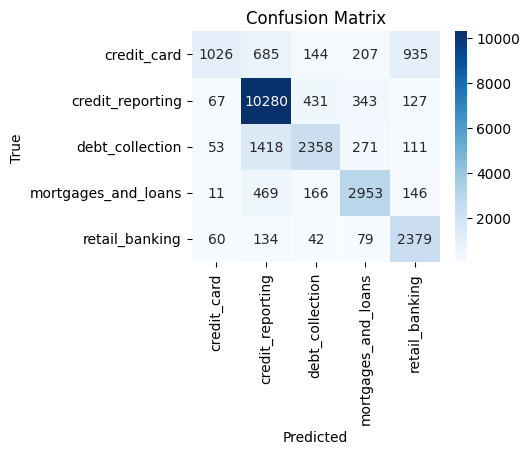

F1-macro: 69.97%
F1-micro: 76.30%
Precision-macro: 75.90%
Precision-micro: 76.30%
Recall-macro: 69.76%
Recall-micro: 76.30%
Accuracy: 76.30%
Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.34      0.49      2997
           1       0.79      0.91      0.85     11248
           2       0.75      0.56      0.64      4211
           3       0.77      0.79      0.78      3745
           4       0.64      0.88      0.74      2694

    accuracy                           0.76     24895
   macro avg       0.76      0.70      0.70     24895
weighted avg       0.77      0.76      0.75     24895



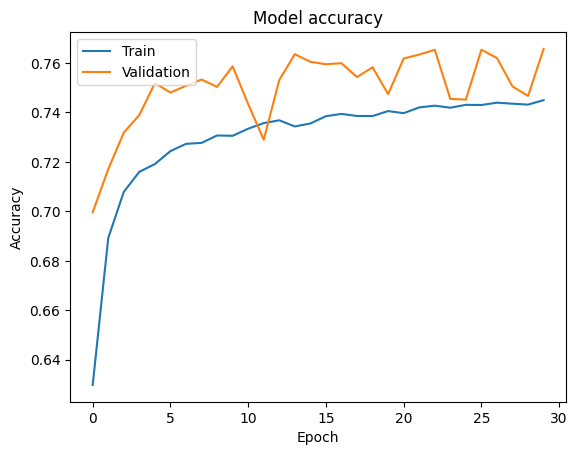

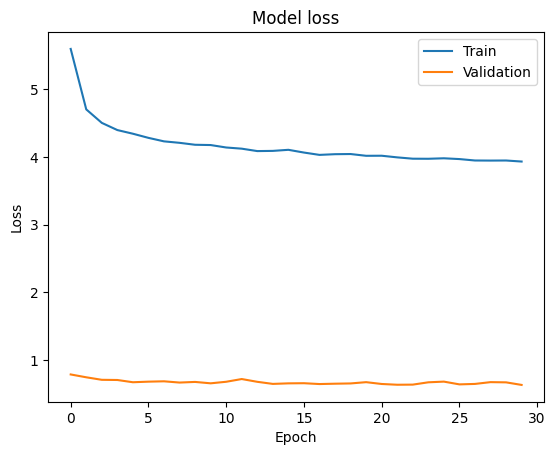

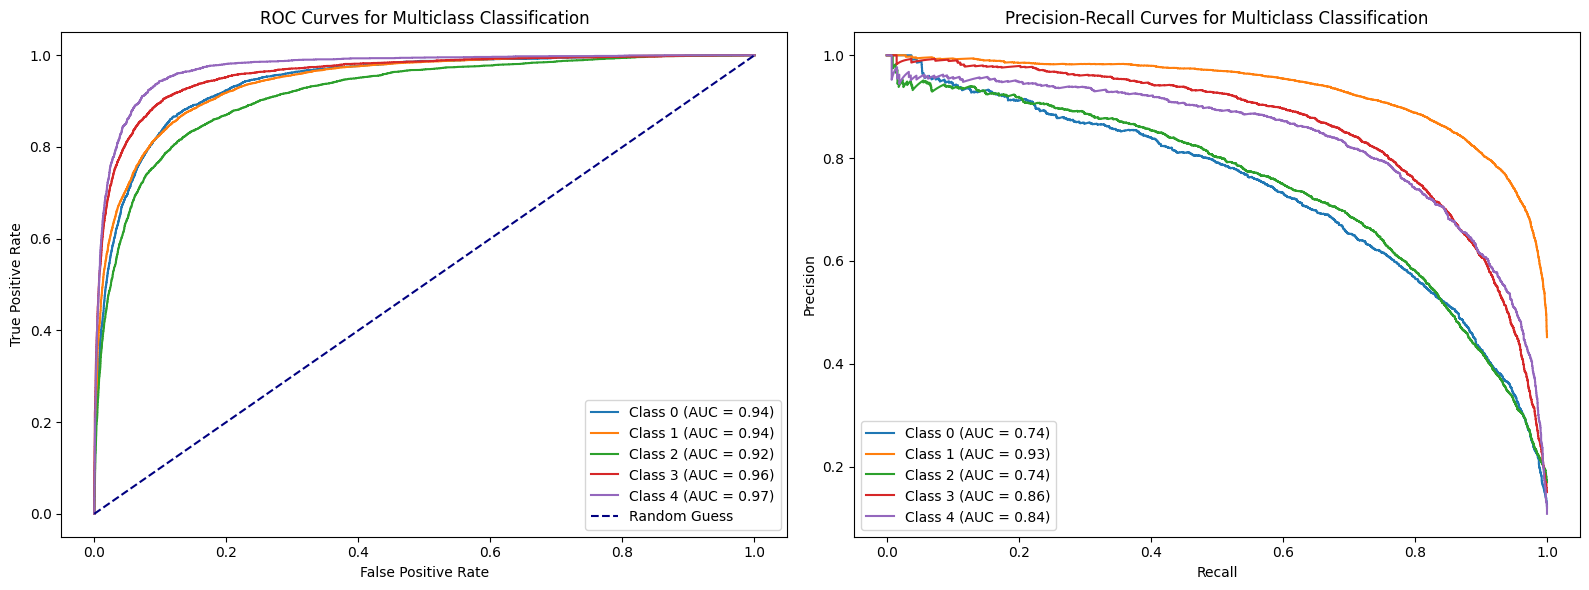

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from collections import Counter
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

# Define the function to create the DNN model
def create_model(learning_rate=0.001, dropout_rate=0.5, units=128):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(100,)),
        Dropout(dropout_rate),
        Dense(units//2, activation='relu'),
        Dropout(dropout_rate),
        Dense(5, activation='softmax')  # Assuming 5 classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])
    return model

# Count the occurrences of each class label in y_train
class_counts = Counter(y_train)
total_samples = len(y_train)

# Calculate class weights manually to handle class imbalance
class_weights = {class_label: total_samples / class_count for class_label, class_count in class_counts.items()}

from sklearn.preprocessing import LabelEncoder

# Encode the class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Flatten y_val to convert it into a 1D array
y_val = np.ravel(y_val)
# Reshape y_train to match the shape of y_val
y_train = np.ravel(y_train)

# Ensure that class_weights is properly formatted
class_weights = {i: weight for i, weight in enumerate(class_weights.values())}

# Ensure that class labels range from 0 to 4
assert np.min(y_val) == 0 and np.max(y_val) == 4, "Class labels in y_val are not in the expected range"

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.5, 0.7],
    'units': [64, 128]
}

# Create a KerasClassifier based on the create_model function
keras_classifier = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_grid,
                                   n_iter=10, cv=3, scoring='accuracy', verbose=2, random_state=0, n_jobs=-1)

# Define fit_params to include class_weights
fit_params = {'class_weight': class_weights}

# Fit RandomizedSearchCV on the validation data
random_search.fit(x_val, y_val_encoded, **fit_params)

# Get the best parameters from the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters on the entire training data
final_model = create_model(**best_params)
history = final_model.fit(x_train, y_train_encoded, epochs=30, batch_size=32, validation_data=(x_val, y_val_encoded), class_weight=class_weights, verbose=2)

# Evaluate the final model on the test set
test_loss, test_acc = final_model.evaluate(text_embeddings_padded_test, y_test_text)
print(f'Test accuracy: {test_acc}')

# Get predicted probabilities for each class
y_probabilities = final_model.predict(text_embeddings_padded_test)

# Convert probabilities to class labels by selecting the class with the highest probability
y_pred = np.argmax(y_probabilities, axis=1)

# Tabulate results
result_list = print_metrics(y_pred, "DNN with hyperparameter tuning", None, results_table)
results_table.append(result_list)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

num_classes = 5

# Convert labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test_text, classes=np.arange(num_classes))

# Calculate ROC curve and AUC for each class using One-vs-Rest (OvR) strategy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate Precision-Recall curve and AUC for each class using One-vs-Rest (OvR) strategy
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], y_probabilities[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot ROC and PR curves for each class
plt.figure(figsize=(16, 6))

# Plot ROC curves
plt.subplot(1, 2, 1)
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc='lower right')

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiclass Classification')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame with the predicted labels
y_pred_DNN = pd.DataFrame({'Index': range(len(y_pred)), 'Predicted Label': y_pred})

# Define the file path where you want to save the CSV file
csv_file_path = 'y_pred_DNN.csv'

# Save the DataFrame to a CSV file
y_pred_DNN.to_csv(csv_file_path, index=False)

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

def hybrid_sampling(x_train, y_train):
    # Apply ADASYN upsampling to the minority classes
    adasyn = ADASYN()
    x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

    # Apply RandomUnderSampler to downsample all classes
    undersampler = RandomUnderSampler()
    x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train_resampled, y_train_resampled)

    return x_train_resampled, y_train_resampled

x_train_resampled, y_train_resampled = hybrid_sampling(x_train, y_train)

In [ ]:
x_val_resampled, y_val_resampled = hybrid_sampling(x_val, y_val)

In [ ]:
print("y_train_resampled:\n", np.unique(y_train_resampled, return_counts=True))
print("y_val_resampled:\n", np.unique(y_val_resampled, return_counts=True))

y_train_resampled:
 (array([0, 1, 2, 3, 4]), array([31529, 31529, 31529, 31529, 31529]))
y_val_resampled:
 (array([0, 1, 2, 3, 4]), array([10742, 10742, 10742, 10742, 10742]))


##Random Forest


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
randomForest = RandomForestClassifier(random_state=0)

# Define the parameters
params = {
    'n_estimators': [15, 25],
    'max_depth': [20, 25],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [3, 5]
}

bayes = BayesSearchCV(randomForest,
                      search_spaces=params,
                      n_iter=10,
                      cv=5,
                      n_jobs=-1,
                      scoring="f1_macro",
                      random_state=0)
bayes.fit(x_val_resampled, y_val_resampled)

rf_best_adasyn = bayes.best_estimator_
print(rf_best_adasyn)

RandomForestClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=23, random_state=0)


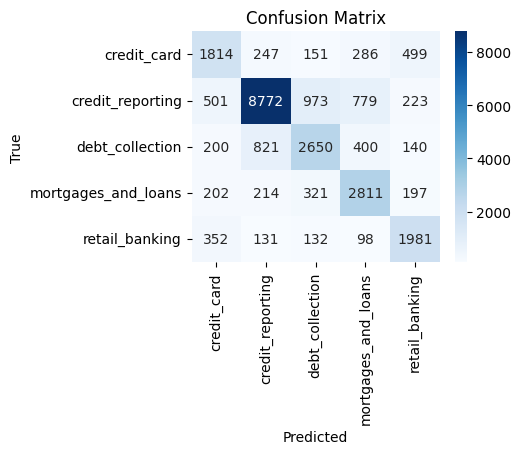

F1-macro: 68.56%
F1-micro: 72.42%
Precision-macro: 67.47%
Precision-micro: 72.42%
Recall-macro: 70.01%
Recall-micro: 72.42%
Accuracy: 72.42%
Classification Report:

               precision    recall  f1-score   support

           0       0.59      0.61      0.60      2997
           1       0.86      0.78      0.82     11248
           2       0.63      0.63      0.63      4211
           3       0.64      0.75      0.69      3745
           4       0.65      0.74      0.69      2694

    accuracy                           0.72     24895
   macro avg       0.67      0.70      0.69     24895
weighted avg       0.73      0.72      0.73     24895



In [ ]:
rf_best_adasyn.fit(x_train_resampled, y_train_resampled)
y_pred = rf_best_adasyn.predict(text_embeddings_padded_test)

# Tabulate results
result_list = print_metrics(y_pred, "Random Forest Classifier with sampling and hyperparameter tuning", results_table)
results_table.append(result_list)

RandomForestClassifier(max_depth=23, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=21, random_state=0)


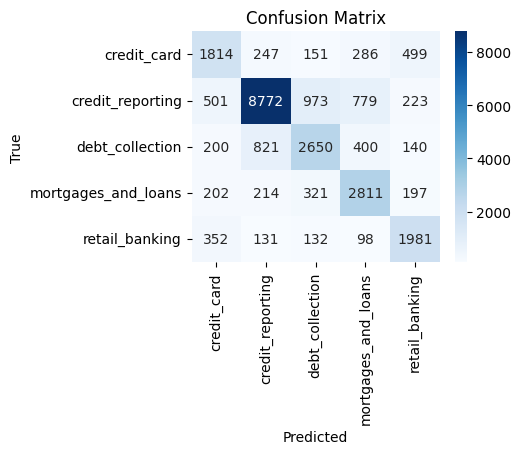

F1-macro: 68.56%
F1-micro: 72.42%
Precision-macro: 67.47%
Precision-micro: 72.42%
Recall-macro: 70.01%
Recall-micro: 72.42%
Accuracy: 72.42%
Classification Report:

               precision    recall  f1-score   support

           0       0.59      0.61      0.60      2997
           1       0.86      0.78      0.82     11248
           2       0.63      0.63      0.63      4211
           3       0.64      0.75      0.69      3745
           4       0.65      0.74      0.69      2694

    accuracy                           0.72     24895
   macro avg       0.67      0.70      0.69     24895
weighted avg       0.73      0.72      0.73     24895



In [ ]:
bayes_og = BayesSearchCV(randomForest,
                      search_spaces=params,
                      n_iter=10,
                      cv=5,
                      n_jobs=-1,
                      scoring="f1_macro",
                      random_state=0)
bayes_og.fit(x_val, y_val)

rf_best_og = bayes_og.best_estimator_
print(rf_best_og)
# Tabulate results
result_list = print_metrics(y_pred, "Random Forest Classifier with hyperparameter tuning", results_table)
results_table.append(result_list)

##Transformer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D, Embedding
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.layers import Reshape
from sklearn.metrics import confusion_matrix

# Parameters
num_classes = 5
max_length = x_train.shape[1]

def transformer_block(inputs, num_heads, d_model, dff, num_classes, rate=0.1):
    # Multi-head attention
    attention_output = Reshape((-1, d_model))(inputs)  # Reshape inputs to add a new dimension
    attention_output = MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, dropout=rate
    )(attention_output, attention_output)
    attention_output = Dropout(rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn_output = Dense(dff, activation='relu')(attention_output)
    ffn_output = Dense(d_model)(ffn_output)
    ffn_output = Dropout(rate)(ffn_output)
    ffn_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    # Apply GlobalAveragePooling1D to ffn_output
    pooled_output = GlobalAveragePooling1D()(ffn_output)

    return pooled_output

def create_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Ensure input_shape is a tuple (sequence_length, embedding_dim)
    if len(input_shape) != 2:
        raise ValueError("Input shape should be (sequence_length, embedding_dim)")

    # Extract embedding_dim from the tuple
    embedding_dim = input_shape[1]

    transformer_block_output = transformer_block(inputs, num_heads=2, d_model=embedding_dim, dff=2048, num_classes=num_classes)

    # Add a Reshape layer to match the expected input shape of GlobalAveragePooling1D
    reshaped_output = Reshape((input_shape[0], 1))(transformer_block_output)

    x = GlobalAveragePooling1D()(reshaped_output)

    x = Dropout(0.1)(x)
    x = Dense(20, activation='relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(num_classes, activation='softmax')(x)  # Add softmax activation

    model = Model(inputs=inputs, outputs=outputs)
    return model

# x_train is a numpy array of shape (num_samples, sequence_length, embedding_dim)
input_shape = (x_train.shape[1], 100)  #(sequence_length, embedding_dim) for GloVe 100D
model = create_transformer_model(input_shape, num_classes)

# Print model summary and tensor shapes
model.summary()
print("Shape of x:", model.layers[-2].output_shape)  # Assuming the second last layer is the Dense layer with 20 units
print("Shape of outputs:", model.layers[-1].output_shape)  # Assuming the last layer is the Dense layer for the output

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=35, validation_data=(x_val, y_val))

# Evaluate the model
y_pred = model.predict(text_embeddings_padded_test)  # test set
y_pred_labels = np.argmax(y_pred, axis=1)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100)]   0           []                               
                                                                                                  
 reshape_6 (Reshape)            (None, 100, 100)     0           ['input_4[0][0]']                
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 100, 100)    80700       ['reshape_6[0][0]',              
 eadAttention)                                                    'reshape_6[0][0]']              
                                                                                                  
 dropout_20 (Dropout)           (None, 100, 100)     0           ['multi_head_attention_3[0]

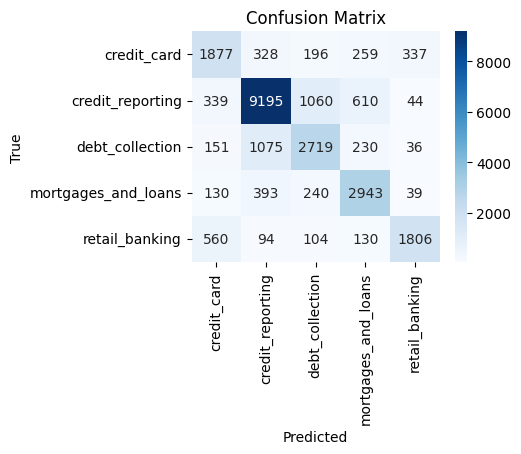

F1-macro: 71.07%
F1-micro: 74.47%
Precision-macro: 71.54%
Precision-micro: 74.47%
Recall-macro: 70.91%
Recall-micro: 74.47%
Accuracy: 74.47%
Classification Report:

               precision    recall  f1-score   support

           0       0.61      0.63      0.62      2997
           1       0.83      0.82      0.82     11248
           2       0.63      0.65      0.64      4211
           3       0.71      0.79      0.74      3745
           4       0.80      0.67      0.73      2694

    accuracy                           0.74     24895
   macro avg       0.72      0.71      0.71     24895
weighted avg       0.75      0.74      0.75     24895



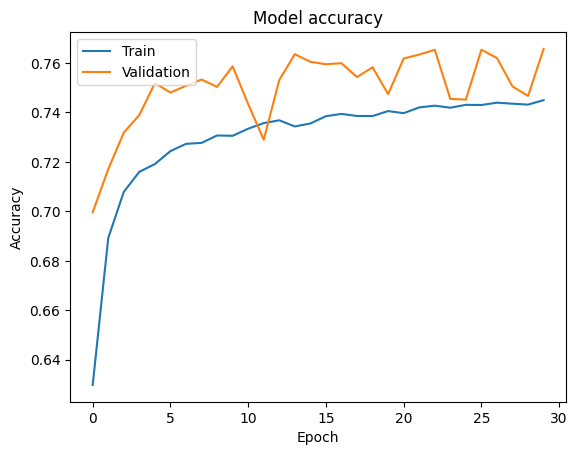

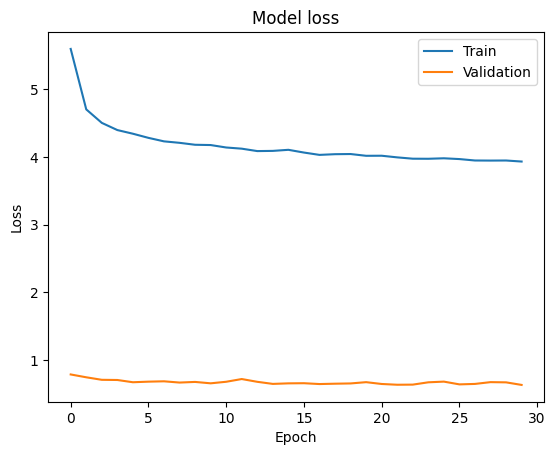

In [ ]:
y_pred_labels = y_pred_labels.drop(columns=['Index'])
result_list = print_metrics(y_pred_labels, "Transformer", None, results_table)
results_table.append(result_list)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
results_table

[['DNN with hyperparameter tuning',
  69.9695793967797,
  75.90262538962021,
  69.75672246707332,
  76.30447881100622],
 ['Random Forest Classifier with sampling and hyperparameter tuning',
  68.56330874695271,
  67.47133324943525,
  70.0077341573442,
  72.41614782084757],
 ['Random Forest Classifier with hyperparameter tuning',
  68.56330874695271,
  67.47133324943525,
  70.0077341573442,
  72.41614782084757],
 ['Transformer',
  71.06645332546258,
  71.53738815524746,
  70.9137579721376,
  74.47278569993975]]

In [ ]:
# Tabulate and display and format the classifier results
df = pd.DataFrame(results_table,
                               columns = ["Classifier","F1-macro","Precision","Recall","Accuracy"])
with pd.option_context('display.precision', 2):
    formatted_table=(df.style.background_gradient(cmap ='Blues'))
formatted_table

# Sort to check the highest performing models
sorted_df = df.sort_values(by='F1-macro', ascending=False).reset_index(drop=True)
sorted_df

sorted_df_table=(sorted_df.style.background_gradient(cmap ='Blues'))
sorted_df_table

,Classifier,F1-macro,Precision,Recall,Accuracy
0,Transformer,71.066453,71.537388,70.913758,74.472786
1,DNN with hyperparameter tuning,69.969579,75.902625,69.756722,76.304479
2,Random Forest Classifier with sampling and hyperparameter tuning,68.563309,67.471333,70.007734,72.416148
3,Random Forest Classifier with hyperparameter tuning,68.563309,67.471333,70.007734,72.416148


In [ ]:
# Implementing class weights for handling class imbalance
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D, Embedding
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.layers import Reshape
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Parameters
num_classes = 5
max_length = x_train.shape[1]

def transformer_block(inputs, num_heads, d_model, dff, num_classes, rate=0.1):
    # Multi-head attention
    attention_output = Reshape((-1, d_model))(inputs)  # Reshape inputs to add a new dimension
    attention_output = MultiHeadAttention(
        num_heads=num_heads, key_dim=d_model, dropout=rate
    )(attention_output, attention_output)
    attention_output = Dropout(rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn_output = Dense(dff, activation='relu')(attention_output)
    ffn_output = Dense(d_model)(ffn_output)
    ffn_output = Dropout(rate)(ffn_output)
    ffn_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

    # Apply GlobalAveragePooling1D to ffn_output
    pooled_output = GlobalAveragePooling1D()(ffn_output)

    return pooled_output

def create_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Ensure input_shape is a tuple (sequence_length, embedding_dim)
    if len(input_shape) != 2:
        raise ValueError("Input shape should be (sequence_length, embedding_dim)")

    # Extract embedding_dim from the tuple
    embedding_dim = input_shape[1]

    transformer_block_output = transformer_block(inputs, num_heads=2, d_model=embedding_dim, dff=2048, num_classes=num_classes)

    # Add a Reshape layer to match the expected input shape of GlobalAveragePooling1D
    reshaped_output = Reshape((input_shape[0], 1))(transformer_block_output)

    x = GlobalAveragePooling1D()(reshaped_output)

    x = Dropout(0.1)(x)
    x = Dense(20, activation='relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(num_classes, activation='softmax')(x)  # Add softmax activation

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Assuming x_train is a numpy array of shape (num_samples, sequence_length, embedding_dim)
input_shape = (x_train.shape[1], 100)  # (sequence_length, embedding_dim) for GloVe 100D
model = create_transformer_model(input_shape, num_classes)

# Print model summary and tensor shapes
model.summary()
print("Shape of x:", model.layers[-2].output_shape)  # second last layer is the Dense layer with 20 units
print("Shape of outputs:", model.layers[-1].output_shape)  # last layer is the Dense layer for the output

# Combine all target sets to get all unique classes
all_classes = np.unique(np.concatenate((y_train, y_val, y_test_text)))

# Flatten the arrays before converting to lists
flattened_y = [item for sublist in np.concatenate((y_train, y_val, y_test_text)) for item in sublist]
flattened_classes = [int(item) for item in all_classes]

# Compute class weights
class_weights = compute_class_weight('balanced', classes=flattened_classes, y=flattened_y)
class_weights = dict(enumerate(class_weights))

# Compile the model before training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val), class_weight=class_weights)

# Evaluate the model
y_pred = model.predict(text_embeddings_padded_test)  # test set
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test_text, y_pred_labels))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_text, y_pred_labels)
print(conf_matrix)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()